# Experiment #9:  Introduction to Natural Language Processing
<b>Mohammed Abed Alkareem</b>
<b>1210708</b>

In [1]:
# !pip install -U datasets transformers[torch] evaluate

In [2]:
from datasets import load_dataset

dataset = load_dataset('MrbBakh/Sentiment140')

In [3]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [4]:
for i in range(10):
    print("-" * 50)
    print(dataset['train'][i])

print("\n\n",dataset['test'].features)


--------------------------------------------------
{'text': "Went to the park with my BFF. Wanted to get abducted by werewolves. Didn't happen. ", 'date': 'Sat Jun 06 20:15:20 PDT 2009', 'user': 'MelissaRM19', 'sentiment': 0, 'query': 'NO_QUERY', '__index_level_0__': 28821}
--------------------------------------------------
{'text': '@zorocaster been a while since i had the charsiew there  its damn good', 'date': 'Wed Jun 24 22:49:35 PDT 2009', 'user': 'icednyior', 'sentiment': 0, 'query': 'NO_QUERY', '__index_level_0__': 7704}
--------------------------------------------------
{'text': '@stephjonesmusic YEs  lol', 'date': 'Fri May 29 21:13:32 PDT 2009', 'user': 'summerglow', 'sentiment': 1, 'query': 'NO_QUERY', '__index_level_0__': 994}
--------------------------------------------------
{'text': 'Hello everyone  Good Morning . . . . why is mascara so difficult to get off???', 'date': 'Sat May 30 21:07:21 PDT 2009', 'user': 'MissStapo', 'sentiment': 1, 'query': 'NO_QUERY', '__index_lev

## 1.2.1  Text Pre-processing

In [5]:
# !pip install nltk

### tokenizing the text

In [6]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize(row):
    tokens = word_tokenize(row['text'])
    # to lowercase and remove punctuation
    tokens = [token.lower() for token in tokens if token.isalpha()]
    return {'tokens': tokens}

dataset = dataset.map(tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
for i in range(10):
    print("-" * 50)
    print(dataset['train'][i]["tokens"])

--------------------------------------------------
['went', 'to', 'the', 'park', 'with', 'my', 'bff', 'wanted', 'to', 'get', 'abducted', 'by', 'werewolves', 'did', 'happen']
--------------------------------------------------
['zorocaster', 'been', 'a', 'while', 'since', 'i', 'had', 'the', 'charsiew', 'there', 'its', 'damn', 'good']
--------------------------------------------------
['stephjonesmusic', 'yes', 'lol']
--------------------------------------------------
['hello', 'everyone', 'good', 'morning', 'why', 'is', 'mascara', 'so', 'difficult', 'to', 'get', 'off']
--------------------------------------------------
['sooo', 'last', 'night', 'was', 'fun', 'waking', 'up', 'for', 'math', 'wasnt', 'haha', 'u', 'reap', 'what', 'u', 'sew']
--------------------------------------------------
['glenzgolfmmbr', 'now', 'that', 'is', 'deep', 'and', 'yes', 'i', 'have', 'had', 'a', 'hole', 'in', 'one', 'very', 'insightful', 'thanks', 'i', 'appreciate', 'the', 'sincerity', 'of', 'that', 'statement'

### remove stop words

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(row):
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in row['tokens'] if token not in stop_words]
    return {'tokens': tokens}

dataset = dataset.map(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [9]:
for i in range(10):
    print("-" * 50)
    print(dataset['train'][i]["tokens"])

--------------------------------------------------
['went', 'park', 'bff', 'wanted', 'get', 'abducted', 'werewolves', 'happen']
--------------------------------------------------
['zorocaster', 'since', 'charsiew', 'damn', 'good']
--------------------------------------------------
['stephjonesmusic', 'yes', 'lol']
--------------------------------------------------
['hello', 'everyone', 'good', 'morning', 'mascara', 'difficult', 'get']
--------------------------------------------------
['sooo', 'last', 'night', 'fun', 'waking', 'math', 'wasnt', 'haha', 'u', 'reap', 'u', 'sew']
--------------------------------------------------
['glenzgolfmmbr', 'deep', 'yes', 'hole', 'one', 'insightful', 'thanks', 'appreciate', 'sincerity', 'statement']
--------------------------------------------------
['ca', 'believe', 'jon', 'kate', 'filed', 'divorce']
--------------------------------------------------
['robertamarquez', 'hey', 'im', 'watching', 'news', 'la', 'packed', 'people', 'hope', 'crusin', 'wh

### Task 1:  
UsePorterStemmerfrom NLTK to stem the tokens.

In [10]:
def stem (row): # to the root form
    stemmer = nltk.PorterStemmer()
    tokens = [stemmer.stem(token) for token in row['tokens']]
    return {'tokens': tokens}

dataset = dataset.map(stem)


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [11]:
for i in range(10):
    print("-" * 50)
    print(dataset['train'][i]["tokens"])

--------------------------------------------------
['went', 'park', 'bff', 'want', 'get', 'abduct', 'werewolv', 'happen']
--------------------------------------------------
['zorocast', 'sinc', 'charsiew', 'damn', 'good']
--------------------------------------------------
['stephjonesmus', 'ye', 'lol']
--------------------------------------------------
['hello', 'everyon', 'good', 'morn', 'mascara', 'difficult', 'get']
--------------------------------------------------
['sooo', 'last', 'night', 'fun', 'wake', 'math', 'wasnt', 'haha', 'u', 'reap', 'u', 'sew']
--------------------------------------------------
['glenzgolfmmbr', 'deep', 'ye', 'hole', 'one', 'insight', 'thank', 'appreci', 'sincer', 'statement']
--------------------------------------------------
['ca', 'believ', 'jon', 'kate', 'file', 'divorc']
--------------------------------------------------
['robertamarquez', 'hey', 'im', 'watch', 'news', 'la', 'pack', 'peopl', 'hope', 'crusin', 'whittier', 'see', 'news']
--------------

## 1.2.2  Word Embedding

In [12]:
# !pip install gensim

In [13]:
from gensim.models import Word2Vec 

word_embedding = Word2Vec(dataset['train']['tokens'],
                           vector_size=100,
                           min_count=1,
                             window=5,
                               sg=1,
                                 hs=0,
                                   negative=10)

In [14]:
#save the model
word_embedding.save('w2v.model')

#load the model
word_embedding = Word2Vec.load('w2v.model')

## 1.2.3  Average Vector

In [15]:
def filter_tokens(example):
    return {
        'tokens': [token for token in example['tokens'] if token in word_embedding.wv]
        }
    
def mean_vector(example):
    return {
        'mean': word_embedding.wv[example['tokens']].mean(axis=0)
    }


dataset = dataset.map(filter_tokens)\
    .filter(lambda e: len(e['tokens']) > 0) \
    .map(mean_vector)

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/40000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

In [16]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean'],
        num_rows: 39924
    })
    validation: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean'],
        num_rows: 4963
    })
    test: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean'],
        num_rows: 4966
    })
})

### Train the Naive Bayes classifier

In [17]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

X = np.array(dataset['train']['mean'])
y = np.array(dataset['train']['sentiment'])
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

#### Task 2:  
Compute the accuracy and the confusion matrix of the trained classifier onthe test dataset.

In [18]:
# Accuracy
from sklearn.metrics import accuracy_score

X_test = np.array(dataset['test']['mean'])
y_test = np.array(dataset['test']['sentiment'])

y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred)*100, "%")

Accuracy:  66.10954490535642 %


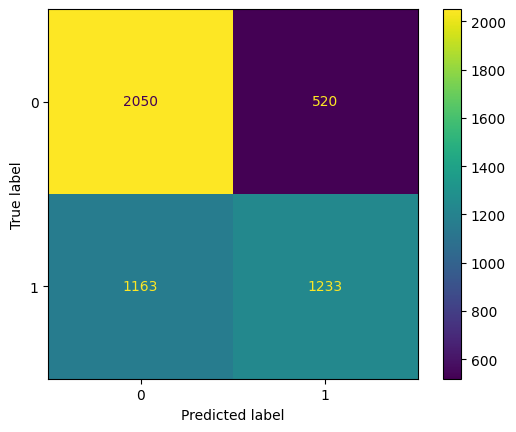

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()

## 1.2.4  LSTM

In [20]:
def vectorize(example):
    return {'vectors': word_embedding.wv[example['tokens']]}

dataset = dataset.map(vectorize)

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

In [21]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors'],
        num_rows: 39924
    })
    validation: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors'],
        num_rows: 4963
    })
    test: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors'],
        num_rows: 4966
    })
})

In [22]:
dataset['train']['vectors'][0]

[[-0.3077804744243622,
  0.11485743522644043,
  -0.10076084733009338,
  -0.026831820607185364,
  0.014581877738237381,
  -0.47586721181869507,
  0.053116947412490845,
  0.7790313363075256,
  -0.5546442866325378,
  -0.30287861824035645,
  -0.10230791568756104,
  -0.6264797449111938,
  -0.061180438846349716,
  0.26077207922935486,
  -0.22512927651405334,
  -0.2120112031698227,
  0.14043408632278442,
  -0.4082675874233246,
  -0.06268969923257828,
  -0.8680192232131958,
  0.5898571610450745,
  -0.053352728486061096,
  0.20394912362098694,
  0.07762085646390915,
  0.011419753544032574,
  -0.18069098889827728,
  -0.24351070821285248,
  0.08597856014966965,
  -0.06025858595967293,
  0.009294620715081692,
  0.42830416560173035,
  0.2926470637321472,
  0.38247790932655334,
  -0.29265281558036804,
  -0.25829580426216125,
  0.4436575174331665,
  0.23318803310394287,
  -0.06482713669538498,
  -0.07046963274478912,
  -0.2062174677848816,
  0.009999590925872326,
  -0.0030181638430804014,
  -0.472297

In [23]:
import torch
import torch.nn as nn

lstm = nn.LSTM(100, 200)
sequence = torch.tensor(dataset['train'][0]['vectors'])
out, _ = lstm(sequence)
sequence.shape

torch.Size([8, 100])

In [24]:
out.shape

torch.Size([8, 200])

In [25]:
lstm = nn.LSTM(100, 200, 2, batch_first=True)
batch = [torch.tensor(sequence) for sequence in dataset['train'][0:4]['vectors']]  

padded_batch = nn.utils.rnn.pad_sequence(batch)
out, _ = lstm(padded_batch)

In [26]:
out.shape

torch.Size([8, 4, 200])

#### Task 3: 
slice the output of the LSTM to get the last token’s output for every sample in the batch.

In [27]:
out[ : ,-1 , :]

tensor([[ 0.0129, -0.0432, -0.0132,  ..., -0.0233,  0.0339,  0.0185],
        [ 0.0074, -0.0465, -0.0071,  ..., -0.0354,  0.0270,  0.0237],
        [ 0.0151, -0.0401, -0.0113,  ..., -0.0402,  0.0293,  0.0162],
        ...,
        [ 0.0155, -0.0420, -0.0167,  ..., -0.0239,  0.0347,  0.0165],
        [ 0.0170, -0.0445, -0.0140,  ..., -0.0227,  0.0333,  0.0185],
        [ 0.0176, -0.0404, -0.0154,  ..., -0.0221,  0.0343,  0.0179]],
       grad_fn=<SliceBackward0>)

###

In [28]:
def word_to_index(example):
    indices = [word_embedding.wv.key_to_index[token] for token in example['tokens']]
    return {'indices': indices}

dataset = dataset.map(word_to_index)

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

In [29]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices'],
        num_rows: 39924
    })
    validation: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices'],
        num_rows: 4963
    })
    test: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices'],
        num_rows: 4966
    })
})

In [30]:
pad_vector = np.zeros(word_embedding.vector_size)
weights = np.vstack([word_embedding.wv.vectors, pad_vector])

vocab_size, embedding_size = weights.shape
pad_idx = vocab_size - 1

In [31]:
def pad_sequences(batch):
    indices = [torch.tensor(sample, dtype=torch.long) for sample in batch['indices']]
    indices = nn.utils.rnn.pad_sequence(indices, batch_first=True,padding_value=pad_idx)
    return {'indices': indices}

dataset = dataset.map(pad_sequences, batched=True,batch_size=None).with_format('torch')

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

In [32]:
import torch.nn.functional as F

class SentimentClassifierLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size,num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        embeddings = self.embedding(x)
        out, _ = self.lstm(embeddings)
        out = out[:, -1, :]
        out = self.fc(out)
        out = F.sigmoid(out)
        return out.squeeze(1)

In [33]:
hidden_size = 128
num_layers = 2
model = SentimentClassifierLSTM(vocab_size=vocab_size,
                                embedding_size=embedding_size,
                                  hidden_size=hidden_size,
                                  num_layers=num_layers)

model.embedding.weight = nn.Parameter(torch.FloatTensor(weights))
model.embedding.weight.requires_grad = False

In [34]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
device = torch.device('cuda'if torch.cuda.is_available() else'cpu')
model = model.to(device)
criterion = criterion.to(device)

device

device(type='cuda')

In [36]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 2048

def to_dataloader(dataset, split, shuffle):
    dataset = TensorDataset(dataset[split]['indices'],dataset[split]['sentiment'])
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

train_dataloader = to_dataloader(dataset,'train', True)
test_dataloader = to_dataloader(dataset,'test', False)
validation_dataloader = to_dataloader(dataset,'validation', False)

In [37]:
def train_one_epoch(dataloader):
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device).float()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#### Task 4:
  Use the train_one_epoch to train the model on 20 epochs.
  
  - Bonus:  Evaluate the model on the validation set after each epoch and print the validation accuracy.
  
  

In [44]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    # Train the model for one epoch
    train_one_epoch(train_dataloader)
    
    # Evaluate the model on the validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            
            outputs = model(inputs)
            
            # Convert probabilities to binary predictions
            predicted = (outputs > 0.5).float()
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # Print the validation accuracy
    val_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_accuracy:.2f}%')


Epoch 1/20, Validation Accuracy: 71.85%
Epoch 2/20, Validation Accuracy: 70.78%
Epoch 3/20, Validation Accuracy: 71.63%
Epoch 4/20, Validation Accuracy: 71.79%
Epoch 5/20, Validation Accuracy: 72.40%
Epoch 6/20, Validation Accuracy: 72.70%
Epoch 7/20, Validation Accuracy: 72.74%
Epoch 8/20, Validation Accuracy: 72.62%
Epoch 9/20, Validation Accuracy: 72.76%
Epoch 10/20, Validation Accuracy: 72.90%
Epoch 11/20, Validation Accuracy: 72.09%
Epoch 12/20, Validation Accuracy: 72.54%
Epoch 13/20, Validation Accuracy: 71.49%
Epoch 14/20, Validation Accuracy: 73.02%
Epoch 15/20, Validation Accuracy: 72.44%
Epoch 16/20, Validation Accuracy: 72.82%
Epoch 17/20, Validation Accuracy: 73.20%
Epoch 18/20, Validation Accuracy: 72.98%
Epoch 19/20, Validation Accuracy: 74.03%
Epoch 20/20, Validation Accuracy: 73.97%


#### Task 5: 
Evaluate the model on the test set using the accuracy and confusion matrix.

Test Accuracy: 74.02%


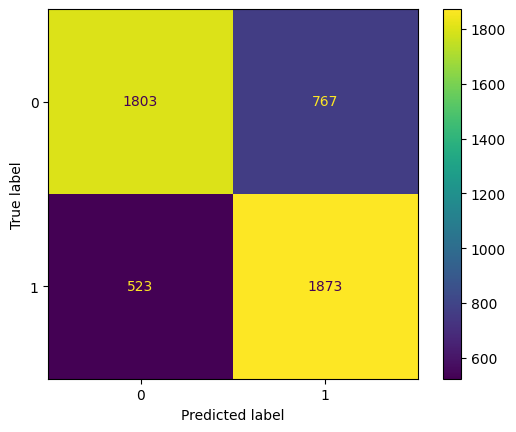

In [45]:
# Evaluate the model on the test set using the accuracy and confusion matrix.

model.eval()
correct = 0
total = 0
predictions = []

with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device).float()

        outputs = model(inputs)

        # Convert probabilities to binary predictions
        predicted = (outputs > 0.5).float()

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predictions.extend(predicted.cpu().numpy())

# Print the test accuracy
test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1])
disp.plot()



  #### Task 6: 
  Compare the performance of the model with the performance of the AverageVector model.

the AverageVector gives accuracy of 66.10954490535642 % while the model accuracy 74.02% as well as the TP and TN were much more in the model

## 1.2.5  Transformers

In [51]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('lyeonii/bert-mini')

In [52]:
tokenizer('Hello, world!')

DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'user', 'labels', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 39924
    })
    validation: Dataset({
        features: ['text', 'date', 'user', 'labels', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4963
    })
    test: Dataset({
        features: ['text', 'date', 'user', 'labels', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4966
    })
})

In [53]:
tokenized_dataset = dataset.map(lambda x: tokenizer(x['text'],padding=True,return_tensors='pt'),
                                 batched=True, batch_size=None).with_format('torch')

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

In [54]:
tokenized_dataset = tokenized_dataset.rename_column('sentiment','labels')

In [55]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'user', 'labels', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 39924
    })
    validation: Dataset({
        features: ['text', 'date', 'user', 'labels', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4963
    })
    test: Dataset({
        features: ['text', 'date', 'user', 'labels', 'query', '__index_level_0__', 'tokens', 'mean', 'vectors', 'indices', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4966
    })
})

In [56]:
from transformers import AutoModelForSequenceClassification

model =AutoModelForSequenceClassification.from_pretrained('lyeonii/bert-mini',num_labels=2)

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/44.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at lyeonii/bert-mini and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [57]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir='sentiment-analysis',num_train_epochs=3,
                                  per_device_train_batch_size=512,per_device_eval_batch_size=512,
                                  weight_decay=0.01,evaluation_strategy='epoch',
                                  save_strategy='epoch',logging_strategy='epoch')

trainer = Trainer(model=model,args=training_args,train_dataset=tokenized_dataset['train'],
                  eval_dataset=tokenized_dataset['validation'])

trainer.train()

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/234 [00:00<?, ?it/s]

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


{'loss': 0.5838, 'grad_norm': 1.3663768768310547, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0}


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.5027585029602051, 'eval_runtime': 21.1582, 'eval_samples_per_second': 234.567, 'eval_steps_per_second': 0.473, 'epoch': 1.0}
{'loss': 0.4824, 'grad_norm': 2.5186636447906494, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0}


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.46112048625946045, 'eval_runtime': 20.8917, 'eval_samples_per_second': 237.558, 'eval_steps_per_second': 0.479, 'epoch': 2.0}
{'loss': 0.4576, 'grad_norm': 1.369411826133728, 'learning_rate': 0.0, 'epoch': 3.0}


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.45664316415786743, 'eval_runtime': 21.1487, 'eval_samples_per_second': 234.672, 'eval_steps_per_second': 0.473, 'epoch': 3.0}
{'train_runtime': 1928.1007, 'train_samples_per_second': 62.119, 'train_steps_per_second': 0.121, 'train_loss': 0.5079252291948367, 'epoch': 3.0}


TrainOutput(global_step=234, training_loss=0.5079252291948367, metrics={'train_runtime': 1928.1007, 'train_samples_per_second': 62.119, 'train_steps_per_second': 0.121, 'total_flos': 370912765800960.0, 'train_loss': 0.5079252291948367, 'epoch': 3.0})

#### Task 7:  
Use compute_metrics in Trainer constructor, with evaluate package, to compute validation accuracy.

In [72]:
test_results = trainer.predict(tokenized_dataset['validation'])
y_pred = test_results.predictions.argmax(axis=-1)

y_test = tokenized_dataset['validation']['labels']

print("Accuracy: ", accuracy_score(y_test, y_pred)*100, "%")

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy:  78.70239774330042 %


#### Task 8: 
Evaluate the model on the test set using the accuracy and confusion matrix.

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy:  78.99718082964156 %


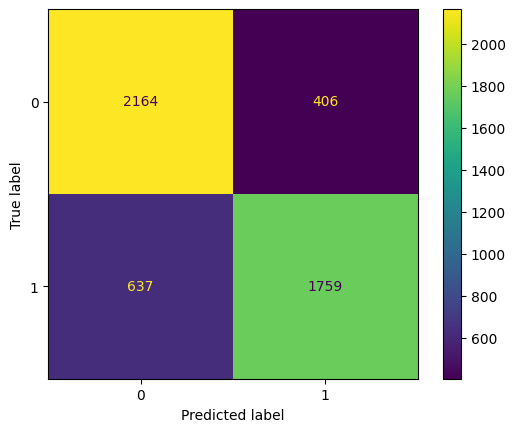

In [74]:
test_results = trainer.predict(tokenized_dataset['test'])
y_pred = test_results.predictions.argmax(axis=-1)

y_test = tokenized_dataset['test']['labels']

print("Accuracy: ", accuracy_score(y_test, y_pred)*100, "%")

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1])
disp.plot()

#### Task 9:  Compare the model with the previously trained models.

| Vectot       | LSTM       | Tranformers       |
|----------------|----------------|----------------|
| 66.10954490535642 %  | 74.02%  | 78.99718082964156 %  |

the best models based on accuracy is the transformers
